<a href="https://colab.research.google.com/github/vishaljbind/CVIP-Projects/blob/main/DS_Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Customer Behavior Analysis through Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

**Loading dataset**

In [3]:
import plotly.express as px

In [4]:
df = pd.read_csv('retail_sales_dataset.csv')

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


**exploring dataset**

In [6]:
df.shape

(1000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [10]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [17]:
num_col=[]
for col in df.columns:
    if(df[col].dtypes != 'object'):
        num_col.append(col)

print(num_col)

['Transaction ID', 'Date', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']


In [16]:
cat_col=[]
for col in df.columns:
    if(df[col].dtypes == 'object'):
        cat_col.append(col)

print(cat_col)

['Customer ID', 'Gender', 'Product Category', 'Month']


In [15]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Month               0
dtype: int64

In [14]:
# Adding 'Month' column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Month'].head()

0    November
1    February
2     January
3         May
4         May
Name: Month, dtype: object

In [13]:
df.shape

(1000, 9)

In [18]:
# 'Total Amount' can't be less than 'Price per unit'
df.drop(df[df['Total Amount']<df['Price per Unit']].index,inplace = True)
df.shape

(1000, 10)

**Exploratory Data Analysis**

**Showing the Trend of Sales Overtime**

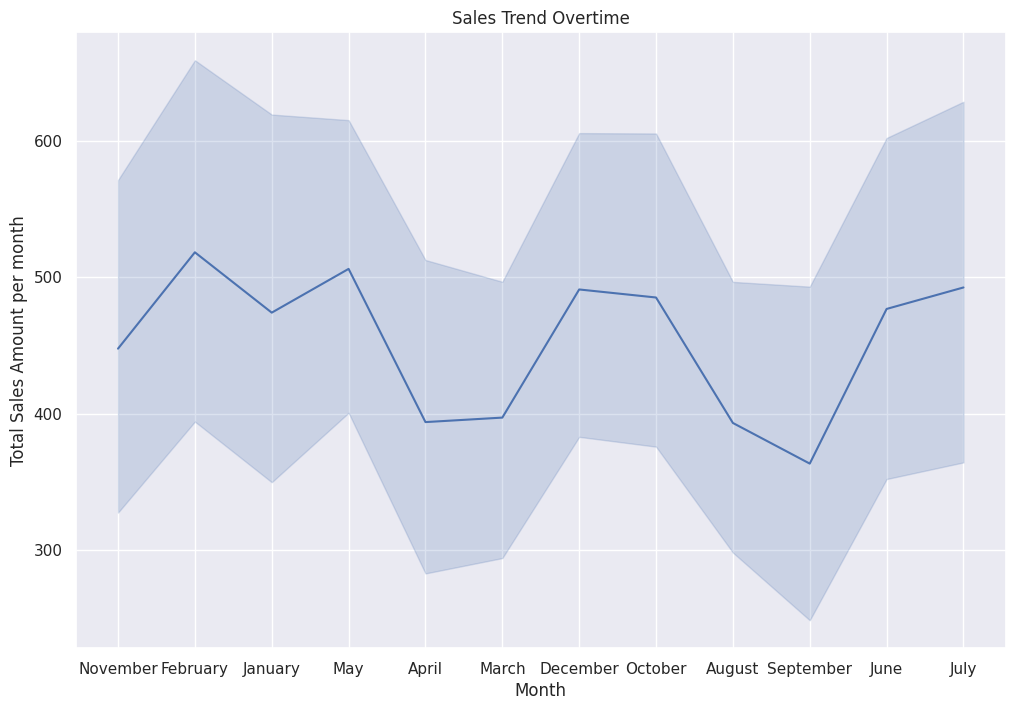

In [19]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month', y='Total Amount', data=df)
plt.title('Sales Trend Overtime')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount per month')
plt.show()

In [20]:
#Finding Transaction frequency with month
df['Month']=df['Date'].dt.month
transaction_count = df.groupby('Month')['Transaction ID'].count()

In [21]:
transaction_count

Month
1      78
2      85
3      73
4      86
5     105
6      77
7      72
8      94
9      65
10     96
11     78
12     91
Name: Transaction ID, dtype: int64

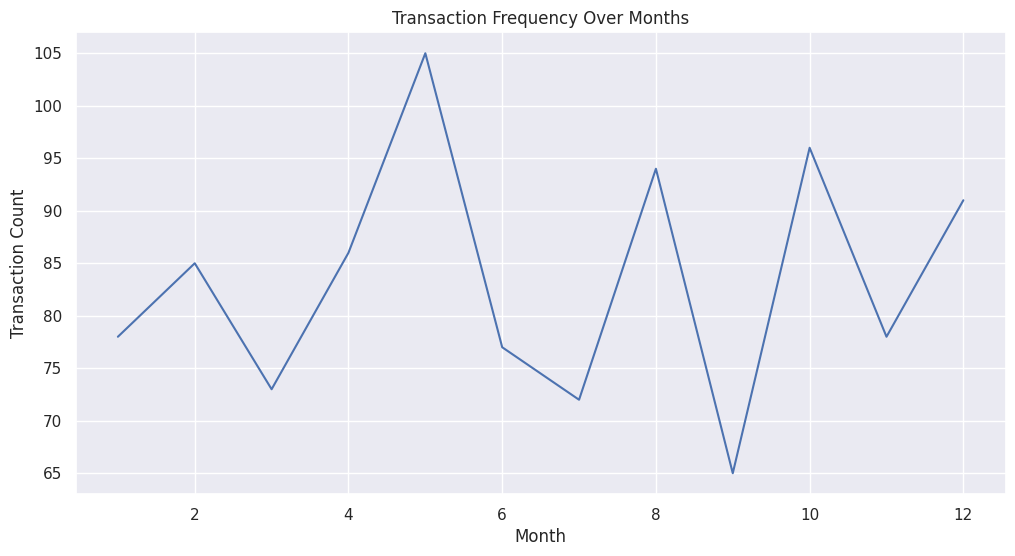

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

In [23]:
#Sales of different Product Categories
col='Product Category'
i=df[col].value_counts().index
v=df[col].value_counts().values

# Pie Plot
fig=px.pie(names=i,values=v,height=350, width=700, color=i,color_discrete_map={'Clothing':'#F4D03F', 'Electronics':'#3498DB', 'Beaty':'#2ECC71'})
fig.update_layout(paper_bgcolor='#A9DFBF')
fig.update_traces(showlegend=False)
fig.update_layout(title=dict(text=f"Pie Plot of {col}",x=0.5,font=dict(size=25)))
fig.update_traces(textinfo='text+percent+label',textfont_color='white',textfont_size=14)
fig.show()


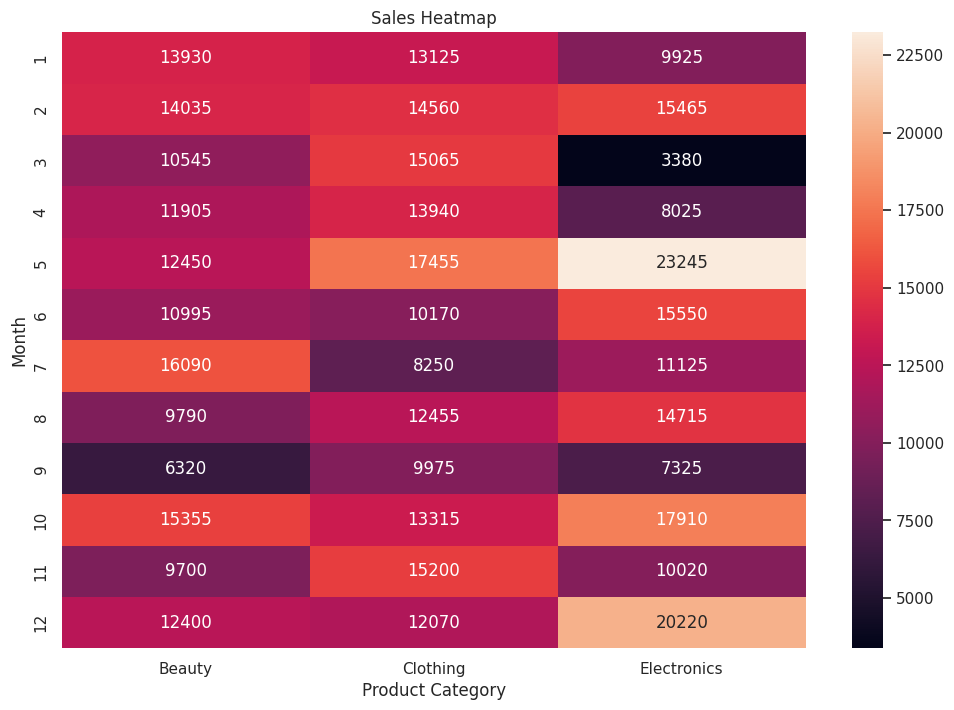

In [24]:
#Analyzing Sales of Product Categories per month
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount', aggfunc='sum')
plt.figure(figsize=(12,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

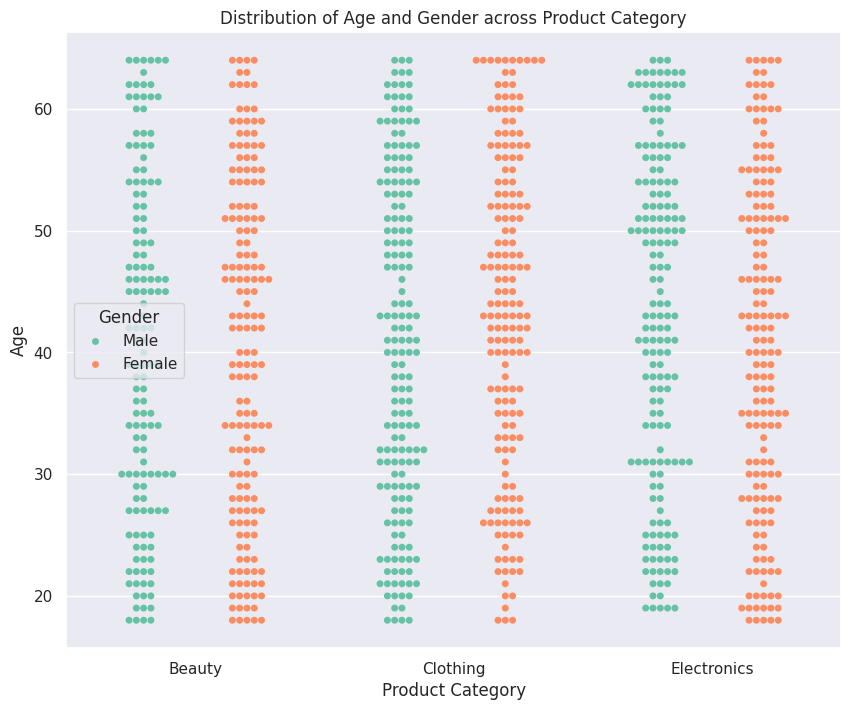

In [25]:
#Distributing 'Age' and 'Gender' columns across Product Category
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, palette='Set2', dodge=True)
plt.title('Distribution of Age and Gender across Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

In [26]:
#Analyzing product quantity purchased by different Age group customers
# Dividing Age Category
age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_group)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,26-35


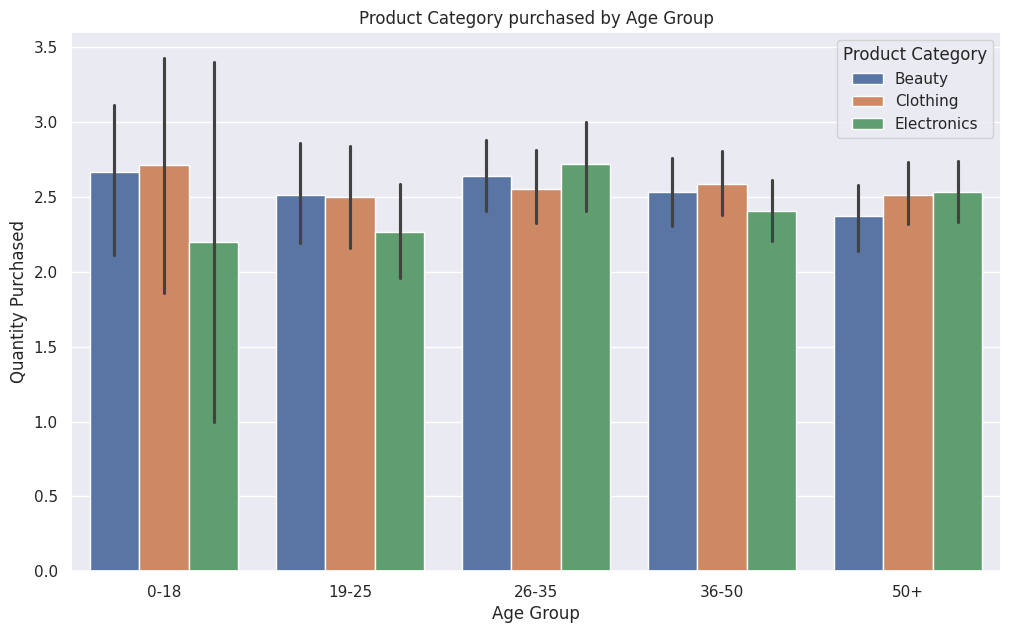

In [27]:
# Bar Plot
plt.figure(figsize=(12,7))
sns.barplot(x='Age Group', y='Quantity', hue='Product Category', data=df)

plt.title('Product Category purchased by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.show()

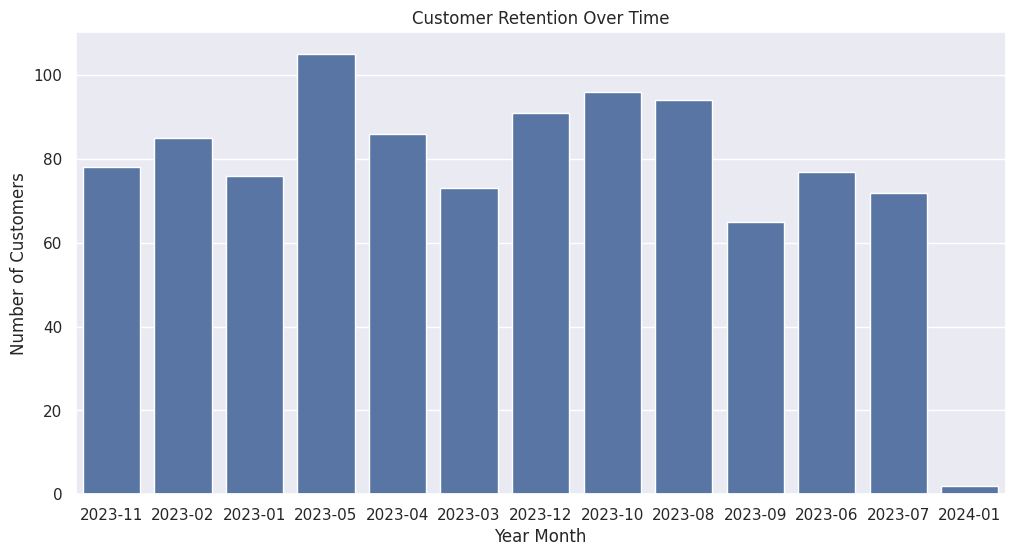

In [29]:
#Showing Customer Retention over Time
retention = df.groupby('Customer ID')['Date'].min().reset_index()
retention['Year Month'] = retention['Date'].dt.to_period('M')

plt.figure(figsize=(12,6))
sns.countplot(x='Year Month', data=retention)
plt.title('Customer Retention Over Time')
plt.xlabel('Year Month')
plt.ylabel('Number of Customers')
plt.show()

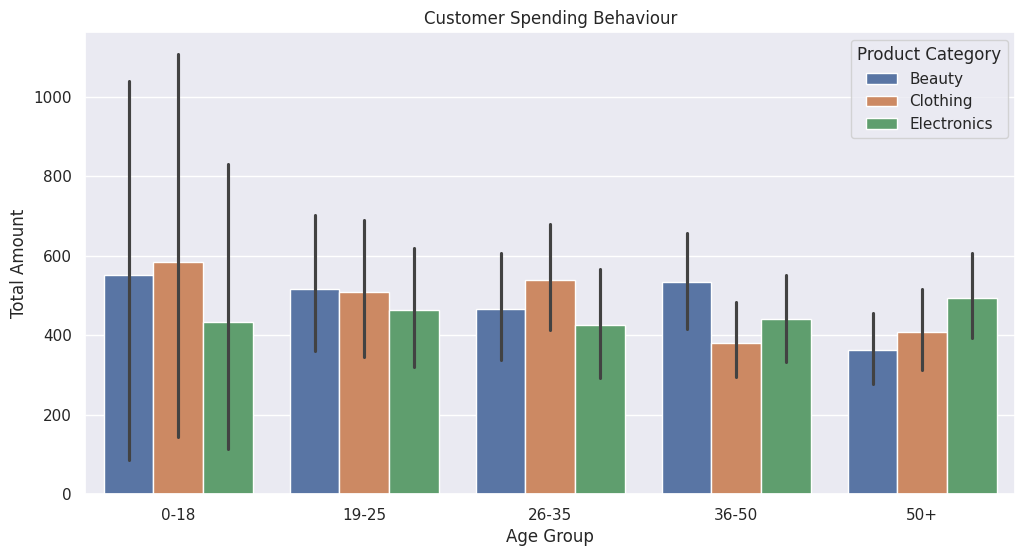

In [30]:
#Analyzing Customer Spending Behaviour
plt.figure(figsize=(12,6))
sns.barplot(x='Age Group', y='Total Amount', hue='Product Category', data=df)

plt.title('Customer Spending Behaviour')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()